In [1]:
import pandas as pd
import numpy as np
import scipy
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

## Load the data and explore 

In [2]:
# importing the data and prinitng few rows to examine the data
# read the CSV file 
df = pd.read_csv("codeset.csv", header=None) 
   
# print the first five rows 
print(df.head()) 

      0     1           2                                     3    4    5   \
0  37013  AFIB   314208002             Rapid atrial fibrillation  NaN  NaN   
1  37014  Afib  3320796013                        Atrial flutter  NaN  NaN   
2  37015  Afib  3322864015               Atypical atrial flutter  NaN  NaN   
3  37016  AFib   421232012   AF - Paroxysmal atrial fibrillation  NaN  NaN   
4  37017  Afib   421233019  PAF - Paroxysmal atrial fibrillation  NaN  NaN   

    6   7   8   9  10         11  12  13  14    15 16  \
0  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   
1  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   
2  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   
3  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   
4  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   

                                     17  
0  3137fbd7-551e-4e7e-96f8-13b12a867098  
1  3137fbd7-551e-4e7e-96f8-13b12a867098  
2  3137fbd7-551e-4e7e-96f8-13b12a867098  
3  3137fbd7-551e-4e7

In [3]:
print(df.shape)

(32413, 18)


In [4]:
# selecting only the columns present in the problem statement
select_columns_index = [3,15]
df = df.iloc[:,select_columns_index]

In [5]:
print(df.shape)

(32413, 2)


In [6]:
print(df.head()) 

                                     3     15
0             Rapid atrial fibrillation  4010
1                        Atrial flutter  4010
2               Atypical atrial flutter  4010
3   AF - Paroxysmal atrial fibrillation  4010
4  PAF - Paroxysmal atrial fibrillation  4010


# Preprocessing and cleaning the data

### Check for any empty cells 
Exmaine the data for any empty entries and remove them 

In [7]:
# prinitng to see if any erros in data
df.iloc[600:605,:]

,3,15
600,Type 1 diabetes mellitus with mild nonprolifer...,NaN
601,Type 1 diabetes mellitus with mild nonprolifer...,NaN
602,Type 1 diabetes mellitus with moderate nonprol...,NaN
603,Type 1 diabetes mellitus with moderate nonprol...,NaN
604,Type 1 diabetes mellitus with moderate nonprol...,NaN


In [8]:
# dropping the rows with empty values i.e. incomplete data
df = df.dropna()
print(df.shape)

(32052, 2)


### Check for any class frequency 
In the output of the below cell it can be observed that there are imbalances in the classes 

In [9]:
# checking number of classes present
print(df[15].value_counts(dropna=False))

M3      5382
M13     4045
M156    2305
M10     2096
6522    1732
        ... 
E020       1
7200       1
7370       1
6011       1
7320       1
Name: 15, Length: 200, dtype: int64


In [10]:
# renaming the cloumns for better readability 
df = df.rename(columns={3: "symptoms", 15: "code"})
df.head()

,symptoms,code
0,Rapid atrial fibrillation,4010
1,Atrial flutter,4010
2,Atypical atrial flutter,4010
3,AF - Paroxysmal atrial fibrillation,4010
4,PAF - Paroxysmal atrial fibrillation,4010


In [11]:
# create numerical lables for training the data 
df["initial_label"] = np.nan
print(df.shape)

value_counts = df["code"].value_counts() # Specific column 
code_index   = value_counts.index
print(code_index)
for i, code_id in enumerate(code_index):
    df.loc[df[df["code"] == code_id].index,"initial_label"] = i

(32052, 3)
Index(['M3', 'M13', 'M156', 'M10', '6522', 'M14', 'M80', 'M68', 'M77', '4000',
       ...
       '7120', '7350', '7380', '7020', '7220', 'E020', '7200', '7370', '6011',
       '7320'],
      dtype='object', length=200)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0aec547630>]],
      dtype=object)

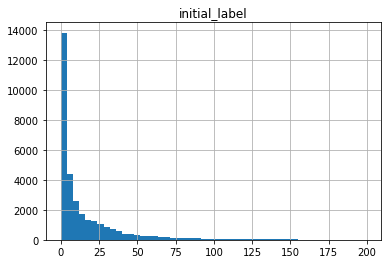

In [12]:
# plot histogram to visualize class distribution 
df.hist(column="initial_label", bins=50)

### Solutions for class imbalance 
1. Collect more data - "not possible at this moment"
1. Data Reduction - Reduce the dataset to solve a smaller classifiaction problem (resampling)
2. Data Augmentation - increasing the data synthetically for the classes with less frequencies

### Removing classes with less data and reducing the problem size
- from option 2 above

In [13]:
# copy the original data frame
df_copy = df.copy()

In [14]:
# reducing the problem to 10 classes
value_counts = df["code"].value_counts() # Specific column 
threshold = 650
to_remove = value_counts[value_counts <= threshold].index
for code in to_remove:
    df = df[df["code"] != code]
    
print(df.shape)

(19638, 3)


In [15]:
print(df["code"].value_counts())

M3      5382
M13     4045
M156    2305
M10     2096
6522    1732
M14     1136
M80      782
M68      750
M77      729
4000     681
Name: code, dtype: int64


In [16]:
def create_labels_df(df, label_column):
    # create numerical lables for training the data 
    df["label"] = np.nan
    print(df.shape)

    value_counts = df[label_column].value_counts() # Specific column 
    code_index   = value_counts.index
    print(code_index)
    for i, code_id in enumerate(code_index):
        df.loc[df[df[label_column] == code_id].index,"label"] = i
        
    return df

In [17]:
# create labels 
df =  create_labels_df(df,"code")

(19638, 4)
Index(['M3', 'M13', 'M156', 'M10', '6522', 'M14', 'M80', 'M68', 'M77', '4000'], dtype='object')


In [18]:
df.head()

,symptoms,code,initial_label,label
41,Pregnancy on oral contraceptive (finding),6522,4.0,4.0
42,Pregnancy on intrauterine device (finding),6522,4.0,4.0
43,Surrogate pregnancy (finding),6522,4.0,4.0
44,Precocious pregnancy (finding),6522,4.0,4.0
45,Pregnant - urine test confirms (finding),6522,4.0,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0aebf74438>]],
      dtype=object)

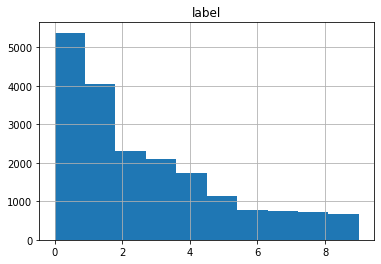

In [19]:
# To do plot histogram
df.hist(column = 'label', bins = 10)

In [20]:
# train and test split https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

def split_to_train_test(df, label_column, train_frac=0.8):
    train_df, test_df = pd.DataFrame(), pd.DataFrame()
    labels = df[label_column].unique()
    for lbl in labels:
        lbl_df = df[df[label_column] == lbl]
        lbl_train_df = lbl_df.sample(frac=train_frac)
        lbl_test_df = lbl_df.drop(lbl_train_df.index)
        #print('\n%s:\n---------\ntotal:%d\ntrain_df:%d\ntest_df:%d' % (lbl, len(lbl_df), len(lbl_train_df), len(lbl_test_df)))
        train_df = train_df.append(lbl_train_df)
        test_df = test_df.append(lbl_test_df)

    return train_df, test_df


In [21]:
train_df, test_df = split_to_train_test(df, "label", train_frac=0.8)
print(train_df.shape, test_df.shape)

(15712, 4) (3926, 4)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
# create a vector array representing the words  
vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(train_df["symptoms"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
## print the bag of words to see
#vectorizer.vocabulary_

In [25]:
print(len(vectorizer.get_feature_names()))

1204


In [26]:
# convert train and test text to vectorizer array
train_data = vectorizer.transform(train_df["symptoms"]).toarray()
test_data  = vectorizer.transform(test_df["symptoms"]).toarray()
print(train_data.shape, test_data.shape)

(15712, 1204) (3926, 1204)


In [27]:
# create train test label arrays 
train_labels = train_df["label"].to_numpy()
test_labels = test_df["label"].to_numpy()
print(train_labels.shape, test_labels.shape)

(15712,) (3926,)


In [28]:
# use tdif to give common words less importance 
transformer = TfidfTransformer()

In [29]:
# fit the tdif transform on train and test data
train_data_tfidf = transformer.fit_transform(train_data)
test_data_tfidf  = transformer.fit_transform(test_data)
print(train_data_tfidf.shape, test_data_tfidf.shape)

(15712, 1204) (3926, 1204)


In [30]:
# convert the format of train and test data to numpy array
train_data_tfidf = scipy.sparse.csr_matrix.toarray(train_data_tfidf)
test_data_tfidf  = scipy.sparse.csr_matrix.toarray(test_data_tfidf)
print(train_data_tfidf.shape, test_data_tfidf.shape)

(15712, 1204) (3926, 1204)


## Trying out to see if logistic regression solves the problem
- can also use this a base line for neural networks 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
classifier = LogisticRegression()
classifier.fit(train_data_tfidf, train_labels)
score = classifier.score(test_data_tfidf, test_labels)

print("Accuracy:", score)

Accuracy: 0.9309730005094243


/home/chaitanya/VirtualEnv/env_py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
import seaborn as sns
from sklearn import metrics

In [34]:
def plot_confusion_matrix(score, true_labels, predicted_labels, n_labels):
    confusion_matrix = metrics.confusion_matrix(true_labels,predicted_labels)
    plt.figure(figsize=(n_labels-1,n_labels-1))
    sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

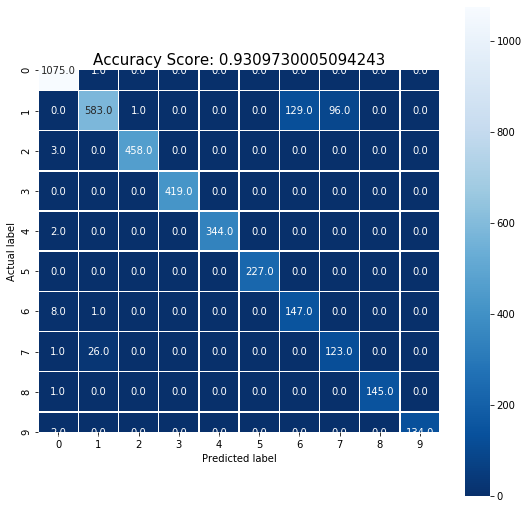

In [35]:
# plot 
plot_confusion_matrix(score, test_labels,classifier.predict(test_data_tfidf), 10)

## Moving to neural networks 
1. step 1 check if it can be solved with simple model before proceeding to deep model 
2. 

In [36]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Dense(10, activation='softmax')
])

In [37]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [38]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [39]:
model.fit(train_data_tfidf, train_labels, epochs=20)

Train on 15712 samples
Epoch 1/20
15712/15712 [==============================] - 1s 64us/sample - loss: 2.2296 - accuracy: 0.7319
Epoch 2/20
15712/15712 [==============================] - 1s 41us/sample - loss: 2.0239 - accuracy: 0.7688
Epoch 3/20
15712/15712 [==============================] - 1s 42us/sample - loss: 1.8730 - accuracy: 0.8036
Epoch 4/20
15712/15712 [==============================] - 1s 43us/sample - loss: 1.7808 - accuracy: 0.8569
Epoch 5/20
15712/15712 [==============================] - 1s 42us/sample - loss: 1.7193 - accuracy: 0.8909
Epoch 6/20
15712/15712 [==============================] - 1s 44us/sample - loss: 1.6781 - accuracy: 0.9015
Epoch 7/20
15712/15712 [==============================] - 1s 43us/sample - loss: 1.6499 - accuracy: 0.9086
Epoch 8/20
15712/15712 [==============================] - 1s 42us/sample - loss: 1.6298 - accuracy: 0.9111
Epoch 9/20
15712/15712 [==============================] - 1s 44us/sample - loss: 1.6148 - accuracy: 0.9131
Epoch 10/20
15

In [40]:
_, accuracy = model.evaluate(test_data_tfidf,  test_labels, verbose=2)

3926/1 - 0s - loss: 1.5084 - accuracy: 0.9284


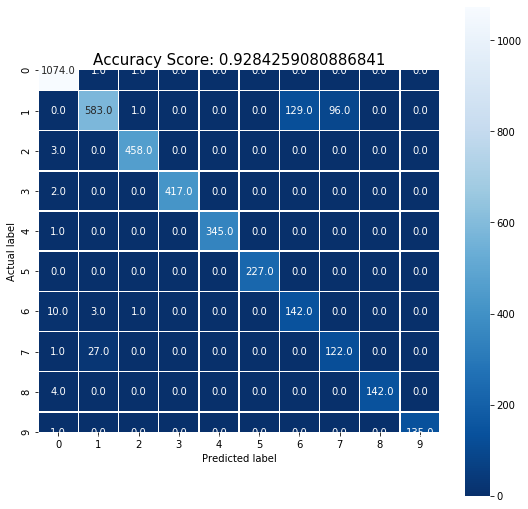

In [41]:
predictions = np.argmax(model.predict(test_data_tfidf), axis=1)
plot_confusion_matrix(accuracy, test_labels, predictions, 10 )

### Trying out a deep model with multiple hidden layers 

In [42]:
model_deep = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [43]:
model_deep.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [44]:
model_deep.fit(train_data_tfidf, train_labels, epochs=20)

Train on 15712 samples
Epoch 1/20
15712/15712 [==============================] - 3s 186us/sample - loss: 1.6139 - accuracy: 0.8555
Epoch 2/20
15712/15712 [==============================] - 3s 160us/sample - loss: 1.5410 - accuracy: 0.9202
Epoch 3/20
15712/15712 [==============================] - 3s 163us/sample - loss: 1.5399 - accuracy: 0.9212
Epoch 4/20
15712/15712 [==============================] - 2s 153us/sample - loss: 1.5397 - accuracy: 0.9215
Epoch 5/20
15712/15712 [==============================] - 2s 152us/sample - loss: 1.5396 - accuracy: 0.9215
Epoch 6/20
15712/15712 [==============================] - 2s 156us/sample - loss: 1.5394 - accuracy: 0.9217
Epoch 7/20
15712/15712 [==============================] - 2s 155us/sample - loss: 1.5395 - accuracy: 0.9217
Epoch 8/20
15712/15712 [==============================] - 2s 155us/sample - loss: 1.5394 - accuracy: 0.9217
Epoch 9/20
15712/15712 [==============================] - 2s 156us/sample - loss: 1.5394 - accuracy: 0.9217
Epoch

In [45]:
model.evaluate(test_data_tfidf,  test_labels, verbose=2)

3926/1 - 0s - loss: 1.5084 - accuracy: 0.9284


[1.5488437977726217, 0.9284259]

### Inference 
From the above deep model experiment it seems like the function is simple enough to be learned by linear model or single output layer

# More things that can be done to improve the accuracy
1. Collect more data to reduce class imbalance.
2. 